In [1]:
### 04/27 update
### used for re generate some figures

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from scipy.stats import binned_statistic
import scipy.optimize as opt
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 15
from mycolorpy import colorlist as mcp
%run Fraunhofer
%run ErrMask

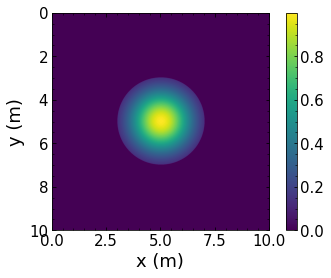

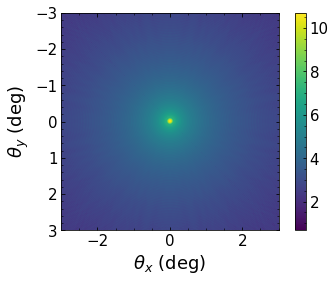

In [6]:
screen = {}
screen['N'] = 2048
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)

ScreenFFT(screen)

lam = 0.002 #m wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 3.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,1024) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
#II1 = Project_I_on_thetagrid(theta_vec,screen,lam) 
#II2 = Project_I_on_thetagrid(theta_vec,screen,lam) 
#theta_vec = np.linspace(0, 2*thetamax, 256)


plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.xlabel('x (m)', fontsize=18)
plt.ylabel('y (m)', fontsize=18)
plt.colorbar()
#plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Plots/screen.png', dpi=600, bbox_inches='tight')
plt.show()
plt.imshow(np.log10(II0),extent=(-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg))
plt.xlabel(r'$\theta_x$ (deg)', fontsize=18)
plt.ylabel(r'$\theta_y$ (deg)', fontsize=18)
plt.colorbar()
#plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Plots/skybeam.png', dpi=600, bbox_inches='tight')



Text(0.5, 1.0, 'Trunc_radius = 0.4 m')

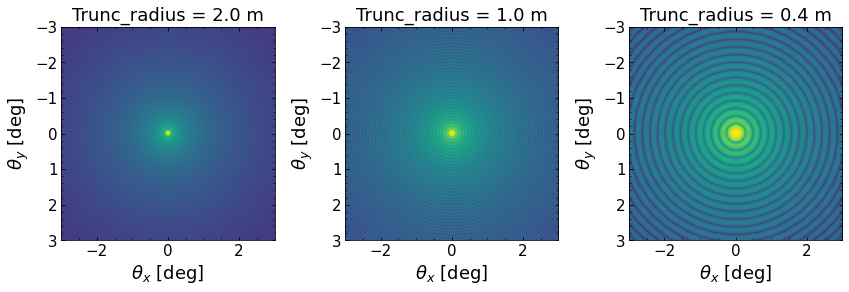

In [5]:
#plt.rcParams['figure.figsize'] = [18,5.5]
fig = plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=0.33)
plt.subplot(1,3,1)
plt.imshow(np.log10(II0), extent=(-thetamaxdeg, thetamaxdeg, thetamaxdeg, -thetamaxdeg))
plt.xlabel(r'$\theta_x$ [deg]',fontsize=18)
plt.ylabel(r'$\theta_y$ [deg]',fontsize=18)
plt.title('Trunc_radius = 2.0 m')
plt.subplot(1,3,2)
plt.imshow(np.log10(II2), extent=(-thetamaxdeg, thetamaxdeg, thetamaxdeg, -thetamaxdeg))
plt.xlabel(r'$\theta_x$ [deg]',fontsize=18)
plt.ylabel(r'$\theta_y$ [deg]',fontsize=18)
plt.title('Trunc_radius = 1.0 m')
plt.subplot(1,3,3)
plt.imshow(np.log10(II1), extent=(-thetamaxdeg, thetamaxdeg, thetamaxdeg, -thetamaxdeg))
plt.xlabel(r'$\theta_x$ [deg]',fontsize=18)
plt.ylabel(r'$\theta_y$ [deg]',fontsize=18)
plt.title('Trunc_radius = 0.4 m')
#plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/sec5_trunc_h.png', bbox_inches='tight', dpi=600)

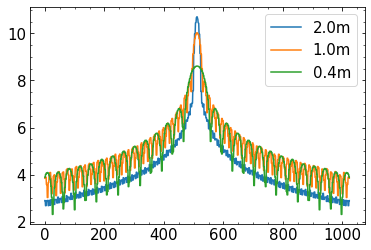

In [9]:
plt.plot(np.log10(II0)[512], label='2.0m')
plt.plot(np.log10(II2)[512], label='1.0m')
plt.plot(np.log10(II1)[512], label='0.4m')
plt.legend()
#plt.xlim(800,1224)

# interpolation

In [92]:
### test interpolation

#def Project_I_on_thetagrid(theta_vec,screen,lam):
N_thetagrid = len(theta_vec)
thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
#thetay_grid = np.flipud(thetay_grid)
#
kphot = 1/lam    # photon k vector.  kphot = 2*np.pi/lam. must be consistent with dk 
#
# Find kx and ky at each (thetax,thetay) grid spot
kx_grid = kphot*np.sin(thetax_grid) #non-linear 
ky_grid = kphot*np.sin(thetay_grid)
#
# Now look at the original kx,ky map of our FT screen.
#
I_grid = np.zeros((N_thetagrid, N_thetagrid))

dk = screen['kx'][0,1]-screen['kx'][0,0]
yy = 1
xx = 1

kx = kx_grid[yy,xx]
ky = ky_grid[yy,xx]
#
nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
ny = ky/dk + screen['N']/2
#
# find the four values of kx,ky that surround
nx1 = int(np.floor(nx))
nx2 = int(np.ceil(nx))
ny1 = int(np.floor(ny))
ny2 = int(np.ceil(ny))

print(nx1, nx2, ny1, ny2)

numsum = 0
denomsum = 0
rr = np.array([])
for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
    rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2 #determines how the distance^2 of a specified point from the four cornor points
    rr = np.append(rr, np.sqrt(rr2))
    w = 1/rr2 # weighted by the inverse distance ( rr2 in (1/m)^2 )
    aa = w*screen['I'][pt[0],pt[1]] # intensity weighted at each cornor point
    #print(rr2, w)
    numsum += aa # add weighted intensity at each cornor point 
    denomsum += w #add the weight 
I_grid[xx,yy] = numsum/denomsum #normalized by the total weight
print(I_grid[xx,yy])
print(screen['I'][nx2, ny2])
# for xx in range(N_thetagrid):
#     for yy in range(N_thetagrid):
#         kx = kx_grid[yy,xx]
#         ky = ky_grid[yy,xx]
#         #
#         nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
#         ny = ky/dk + screen['N']/2
#         #
#         # find the four values of kx,ky that surround
#         nx1 = int(np.floor(nx))
#         nx2 = int(np.ceil(nx))
#         ny1 = int(np.floor(ny))
#         ny2 = int(np.ceil(ny))
#             # Go through four points surrounding our grid point's position and take weighted average.
#             numsum = 0
#             denomsum = 0
#             for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
#                 rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2
#                 w = 1/rr2
#                 numsum += w*screen['I'][pt[0],pt[1]]
#                 denomsum += w
#                 #
#                 #numsum += screen['I'][pt[0],pt[1]]
#                 #denomsum += 1
#             I_grid[xx,yy] = numsum/denomsum
#return


82 83 82 83
0.8855555450781655
0.9489259741249381


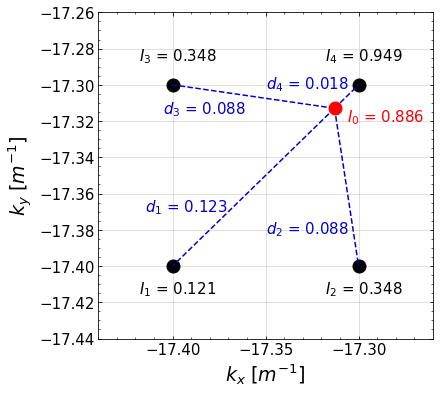

In [96]:
# plot
I = np.array([screen['I'][nx1, ny1], screen['I'][nx1, ny2], screen['I'][nx2, ny1], screen['I'][nx2, ny2]])
x = np.array([screen['kx'][nx1,ny1], screen['kx'][nx1,ny2], screen['kx'][nx2,ny1], screen['kx'][nx2,ny2]])
y = np.array([screen['ky'][nx1,ny1], screen['ky'][nx1,ny2], screen['ky'][nx2,ny1], screen['ky'][nx2,ny2]])

fig = plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 15
plt.plot(x, y, 'o', ms=13, color='black')
plt.xlabel(r'$k_x$ [$m^{-1}$]', fontsize=19)
plt.ylabel(r'$k_y$ [$m^{-1}$]', fontsize=19)
cl='mediumblue'
a = [kx, x[0]]
b = [ky, y[0]]
plt.plot(a,b, ls='--', color=cl)
a = [kx, x[1]]
b = [ky, y[1]]
plt.plot(a,b, ls='--', color=cl)
a = [kx, x[2]]
b = [ky, y[2]]
plt.plot(a,b, ls='--', color=cl)
a = [kx, x[3]]
b = [ky, y[3]]
plt.plot(a,b, ls='--', color=cl)
plt.plot(kx, ky, 'o', ms=13, color='red')
plt.xlim(-17.44, -17.26)
plt.ylim(-17.44, -17.26)
plt.text(x[0]-0.018, y[0]-0.015, r'$I_1$ = {:.3f}'.format(I[0]), color='black')
plt.text(x[1]-0.018, y[1]-0.015, r'$I_2$ = {:.3f}'.format(I[1]), color='black')
plt.text(x[2]-0.018, y[2]+0.0135,  r'$I_3$ = {:.3f}'.format(I[2]), color='black')
plt.text(x[3]-0.018, y[3]+0.0135,  r'$I_4$ = {:.3f}'.format(I[3]), color='black')

plt.text(-17.415, -17.37, r'$d_1$ = {:.3f}'.format(rr[0]), color=cl)
plt.text(-17.35, -17.382, r'$d_2$ = {:.3f}'.format(rr[1]), color=cl)
plt.text(-17.405, -17.316, r'$d_3$ = {:.3f}'.format(rr[2]), color=cl)
plt.text(-17.35, -17.302, r'$d_4$ = {:.3f}'.format(rr[3]), color=cl)

plt.text(-17.306, -17.32, r'$I_0$ = {:.3f}'.format(I_grid[xx,yy]),color='red')
plt.grid(alpha=0.5)
plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/interp_h.png', bbox_inches='tight', dpi=600)

# beam verification

In [11]:
# measure sigma in angle
def gaussian(x, A, sigma, x0):
    g = A*np.exp(-(x-x0)**2/(2*sigma**2))
    return(g)

def analytical(l, sigma):
    fft = bin_mean0.max()* np.exp(-l*(l+1)*sigma**2/2)
    return(fft)

In [16]:
screen = {}
screen['N'] = 1500
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 4.5)
ScreenFFT(screen)

N_theta=512
lam = 0.002 #mm wavelength
thetamaxdeg = 3.0
thetamax = thetamaxdeg*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
# shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
theta_vec = np.linspace(0,2*thetamax,N_theta) 

# FT of sky intensity
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in 1/rad space

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

In [17]:
# bin sky intensity radially
(thetax, thetay) = np.meshgrid(theta_vec, theta_vec) # rad 
theta_r = np.sqrt((thetax-thetax.max()/2)**2 + (thetay-thetay.max()/2)**2)
bins = np.linspace(0,theta_r.max(),int(len(theta_vec)/1.2))
theta_flatten = theta_r.flatten()
I_flatten = II0.flatten()
bin_I0, bin_edge, bin_num = binned_statistic(theta_flatten, I_flatten, statistic='mean', bins=bins) 

# fit 1D in sky (rad space)
# ### this uses the horizontal slice of data
(fit, err) = opt.curve_fit(gaussian, theta_vec, II0[int(n/2)], p0=np.array([II0[int(n/2)].max(), 0.00026, theta_vec.max()/2]), absolute_sigma=True)
beam_sky = gaussian(theta_vec, fit[0], fit[1], fit[2])
### this uses the binned sky intensity
# (fit, err) = opt.curve_fit(gaussian, bins[:-1], bin_I0, p0=np.array([II0[int(n/2)].max(), 0.00026, 0.0]), absolute_sigma=True)
# beam_sky = gaussian(theta_vec, fit[0], fit[1], theta_vec.max()/2)
print('beam sigma is {:.5f} rad'.format(fit[1]))


# numerical: average (FT of II0)^2 radially 
bin_edges = np.linspace(0,l.max(),int(len(l_vec)/2))
l_flatten = l.flatten()
fft_numerical = fft_I0.flatten()
bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical, statistic='mean', bins=bin_edges) 
print(fit)

beam sigma is 0.00026 rad
[1.70499541e+10 2.57484401e-04 5.23384602e-02]


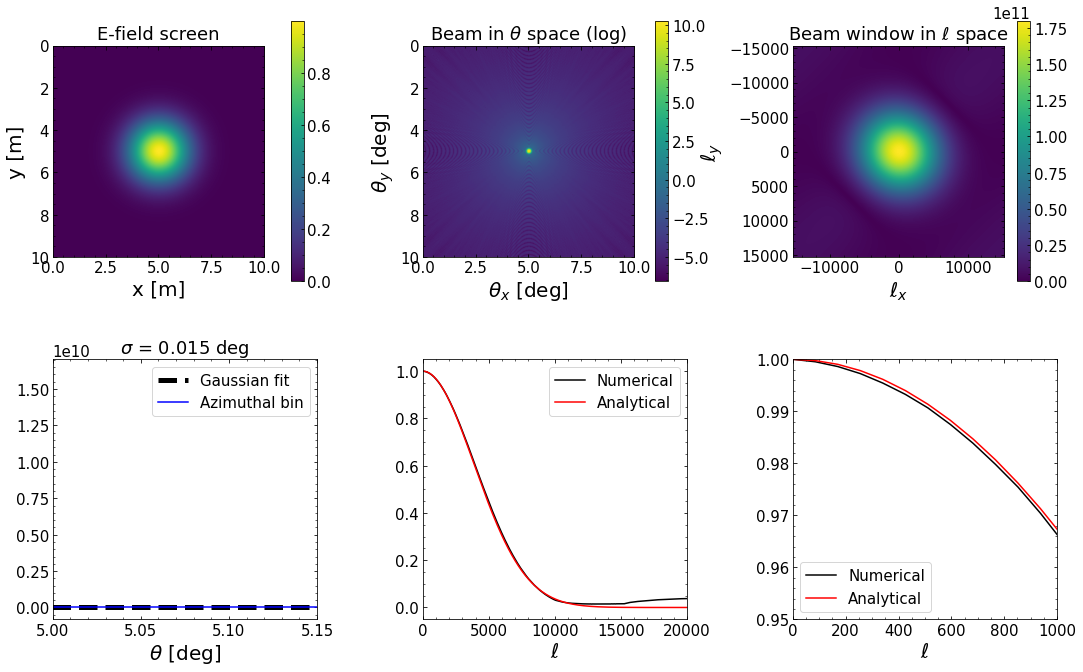

In [18]:
fig = plt.figure(figsize=(18,11))
plt.subplots_adjust(wspace=0.4,
                    hspace=0.3)

plt.subplot(2,3,1)
plt.imshow(screen['E'], interpolation=None, extent=(0, 10, 10, 0)) 
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('y [m]', fontsize=20)
plt.title('E-field screen', fontsize=18)
plt.colorbar(anchor=(0.5, 0.))
plt.subplot(2,3,2)
plt.imshow(np.log10(II0), interpolation=None, extent=(0, 10, 10, 0)) 
plt.colorbar(anchor=(0.3, 0.))
plt.xlabel(r'$\theta_x$ [deg]', fontsize=20)
plt.ylabel(r'$\theta_y$ [deg]', fontsize=20)

plt.title(r'Beam in $\theta$ space (log)', fontsize=18)
plt.subplot(2,3,3)
plt.imshow(fft_I0, interpolation=None, extent=(l_x.min(), l_x.max(), l_y.max(), l_y.min())) 
plt.colorbar()
plt.xlabel(r'$\ell_x$', fontsize=20)
plt.ylabel(r'$\ell_y$', fontsize=20)
plt.title(r'Beam window in $\ell$ space', fontsize=18)
plt.subplot(2,3,4)
plt.plot(theta_vec*180/np.pi, beam_sky, ls='--', lw=5, color='black', label='Gaussian fit')
plt.plot((bins[:-1]+thetax.max()/2)*180/np.pi, bin_I0, color='blue', label='Azimuthal bin')
plt.title(r'$\sigma$ = {:.3f} deg'.format(fit[1]*180/np.pi), fontsize=18)
plt.xlabel(r'$\theta$ [deg]', fontsize=20)
#plt.xlim(0.5*theta_vec.max(), 0.525*theta_vec.max())
plt.xlim(5,5.15)
plt.legend(loc='upper right')
#plot analytical & numerical solutions
plt.subplot(2,3,5)
plt.plot(bin_edges[:-1], bin_mean0/bin_mean0.max(), color='black', label='Numerical')
plt.plot(bin_edges, analytical(bin_edges, fit[1])/bin_mean0.max(), color='red', label='Analytical')
plt.xlabel(r'$\ell$', fontsize=20)
plt.xlim(0,20000)
plt.legend()
plt.subplot(2,3,6)
plt.plot(bin_edges[:-1], bin_mean0/bin_mean0.max(), color='black', label='Numerical')
plt.plot(bin_edges, analytical(bin_edges, fit[1])/bin_mean0.max(), color='red', label='Analytical')
plt.xlabel(r'$\ell$', fontsize=20)
plt.xlim(0,1000)
plt.ylim(0.95, 1.0)
plt.legend()

#plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/Verification_h.png', bbox_inches='tight', dpi=600)

# replot $\Delta r$ vs. noise
## amplitude

<ipython-input-33-c9f0c7db3263>:40: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/fig_amp_r_h.png', bbox_inches='tight', dpi=600)


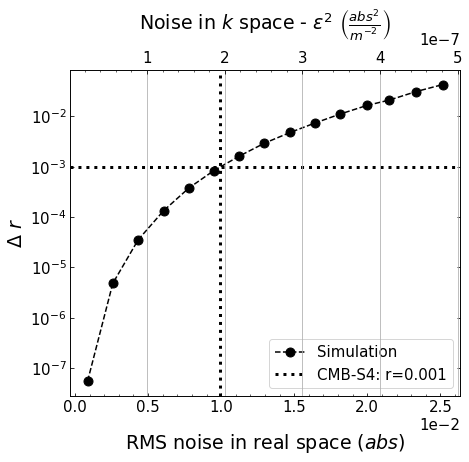

In [33]:
#(amp, noise_norm, r, RMS_real) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phase_r.csv', unpack=True, usecols=(0,1,3,5))
(amp, noise_norm, r, RMS_real) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/R_noise_amp_r.csv', unpack=True, usecols=(0,1,3,5))

r_1d = np.array([])
for r_i in r:
    if r_i not in r_1d:
        r_1d = np.append(r_1d, r_i)
noise_1d = np.array([])
for noise_i in noise_norm:
    if noise_i not in noise_1d:
        noise_1d = np.append(noise_1d, noise_i)
amp_1d = np.array([])
for amp_i in amp:
    if amp_i not in amp_1d:
        amp_1d = np.append(amp_1d, amp_i)
rms_1d = np.array([])
for rms_i in RMS_real:
    if rms_i not in rms_1d:
        rms_1d = np.append(rms_1d, rms_i)

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.semilogy(rms_1d, r_1d, 'o--', ms=9, color='black', label='Simulation')
plt.axvline(0.0099, ls=':', lw=3, color='black')
plt.axhline(0.001, ls=':', lw=3, label='CMB-S4: r=0.001', color='black')
ax1.set_xlabel('RMS noise in real space ($abs$)', fontsize=19)
ax1.xaxis.set_label_coords(.5, -0.11)

ax1.set_ylabel(r'$\Delta$ $r$', fontsize=19)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc='lower right')
ax2 = ax1.twiny()
#plt.axvline(1.94e-7, ls=':', lw=3, color='red')

ax2.xaxis.set_label_coords(.5, 1.122)
ax2.set_xlim(noise_1d.min(), noise_1d.max())
ax2.set_xlabel(r'Noise in $k$ space - $\epsilon^2$ $\left(\frac{abs^2}{m^{-2}}\right)$', fontsize=19)
plt.grid()

plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/fig_amp_r_h.png', bbox_inches='tight', dpi=600)

## phase

<ipython-input-34-cbc2e35e6a15>:40: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/fig_phase_r_h.png', bbox_inches='tight', dpi=600)


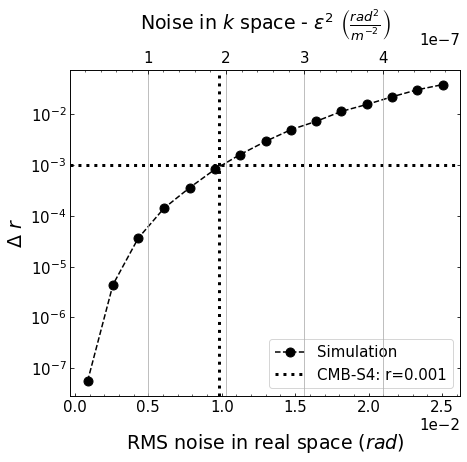

In [34]:
#(amp, noise_norm, r, RMS_real) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/data_phase_r.csv', unpack=True, usecols=(0,1,3,5))
(amp, noise_norm, r, RMS_real) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/R_noise_phase_r.csv', unpack=True, usecols=(0,1,3,5))

r_1d = np.array([])
for r_i in r:
    if r_i not in r_1d:
        r_1d = np.append(r_1d, r_i)
noise_1d = np.array([])
for noise_i in noise_norm:
    if noise_i not in noise_1d:
        noise_1d = np.append(noise_1d, noise_i)
amp_1d = np.array([])
for amp_i in amp:
    if amp_i not in amp_1d:
        amp_1d = np.append(amp_1d, amp_i)
rms_1d = np.array([])
for rms_i in RMS_real:
    if rms_i not in rms_1d:
        rms_1d = np.append(rms_1d, rms_i)

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
ax1.semilogy(rms_1d, r_1d, 'o--', ms=9, color='black', label='Simulation')
plt.axvline(0.0098, ls=':', lw=3, color='black')
plt.axhline(0.001, ls=':', lw=3, label='CMB-S4: r=0.001', color='black')
ax1.set_xlabel('RMS noise in real space ($rad$)', fontsize=19)
ax1.xaxis.set_label_coords(.5, -0.11)

ax1.set_ylabel(r'$\Delta$ $r$', fontsize=19)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc='lower right')
ax2 = ax1.twiny()
#plt.axvline(1.91e-7, ls=':', lw=3, color='red')

ax2.xaxis.set_label_coords(.5, 1.122)
ax2.set_xlim(noise_1d.min(), noise_1d.max())
ax2.set_xlabel(r'Noise in $k$ space - $\epsilon^2$ $\left(\frac{rad^2}{m^{-2}}\right)$', fontsize=19)
plt.grid()

plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/fig_phase_r_h.png', bbox_inches='tight', dpi=600)

In [140]:
r_1d

array([5.54409703e-08, 4.40972784e-06, 3.63672935e-05, 1.41305306e-04,
       3.58763961e-04, 8.22135640e-04, 1.61304926e-03, 2.95200405e-03,
       5.03287066e-03, 7.26638192e-03, 1.14538083e-02, 1.57553720e-02,
       2.22798838e-02, 3.05000527e-02, 3.86659421e-02])

## leakage vs. noise - amplitude errors

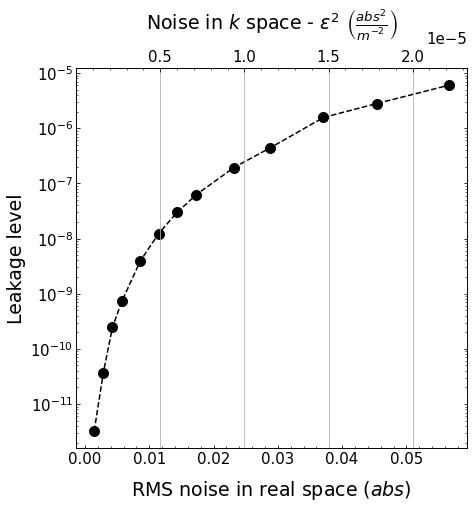

In [35]:
(amp, leak, noise_norm, RMS_real) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/Replot_leakrms_amp.csv', unpack=True, usecols=(0,1,2,3))
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.semilogy(RMS_real, leak, 'o--', ms=10, color='black')
ax1.set_xlabel('RMS noise in real space ($abs$)', fontsize=19)
ax1.set_ylabel('Leakage level', fontsize=19)
ax1.xaxis.set_label_coords(.5, -0.08)

ax2.xaxis.set_label_coords(.5, 1.1)
ax2.set_xlim(noise_norm.min(), noise_norm.max())
ax2.set_xlabel(r'Noise in $k$ space - $\epsilon^2$ $\left(\frac{abs^2}{m^{-2}}\right)$', fontsize=19)
#plt.show()
plt.grid()
plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/leak_rms_amp_h.png', bbox_inches='tight', dpi=600)

## leakage vs. noise - phase errors

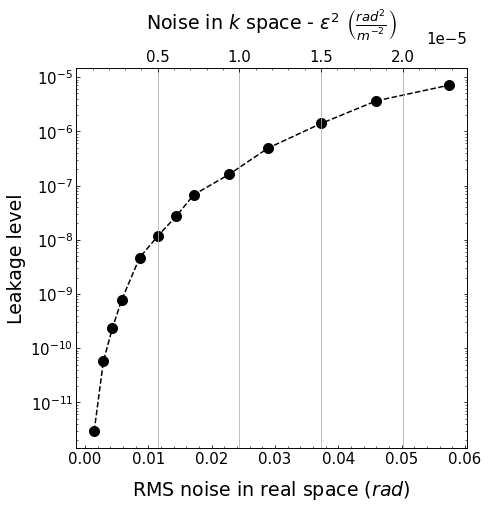

In [36]:
(amp, leak, noise_norm, RMS_real) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/Replot_leakrms_phase.csv', unpack=True, usecols=(0,1,2,3))
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.semilogy(RMS_real, leak, 'o--', ms=10, color='black')
ax1.set_xlabel('RMS noise in real space ($rad$)', fontsize=19)
ax1.set_ylabel('Leakage level', fontsize=19)
ax1.xaxis.set_label_coords(.5, -0.08)
ax2.xaxis.set_label_coords(.5, 1.1)
ax2.set_xlim(noise_norm.min(), noise_norm.max())
ax2.set_xlabel(r'Noise in $k$ space - $\epsilon^2$ $\left(\frac{rad^2}{m^{-2}}\right)$', fontsize=19)
plt.grid()
#plt.show()
plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/leak_rms_phase_h.png', bbox_inches='tight', dpi=600)

In [121]:
# theta = sin(k_x / k_lam)
klam = 1/0.002
kkx = np.arcsin(5*np.pi/180) * klam
print(kkx)

43.68880296210898


In [118]:
screen['kap'].max()

289.6309375740099